In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('2.2 cost_revenue_dirty.csv.csv')

In [3]:
data.head(1)

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
def converttoint(x):
    x=x.split('$')[1]
    return int(x.replace(',',''))    

In [6]:
data['Production Budget ($)']=data['Production Budget ($)'].apply(converttoint)

In [7]:
data['Worldwide Gross ($)']=data['Worldwide Gross ($)'].apply(converttoint)

In [8]:
data['Domestic Gross ($)']=data['Domestic Gross ($)'].apply(converttoint)

In [9]:
data.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [10]:
type(data['Production Budget ($)'][1])

numpy.int64

In [11]:
data.drop(['Rank','Release Date','Movie Title','Domestic Gross ($)'],axis=1,inplace=True)

In [12]:
def zerotonan(x):
    if x==0:
        return np.nan
    return x

In [13]:
data['Worldwide Gross ($)']=data['Worldwide Gross ($)'].apply(zerotonan)

In [14]:
data.head()

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000.0
1,385907,NaN
2,200000,8000000.0
3,100000,3000000.0
4,245000,22000000.0


In [15]:
data.dropna(inplace=True)

In [16]:
data.head()

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000.0
2,200000,8000000.0
3,100000,3000000.0
4,245000,22000000.0
5,3900000,9000000.0


Text(0, 0.5, 'Worldwide Gross ($)')

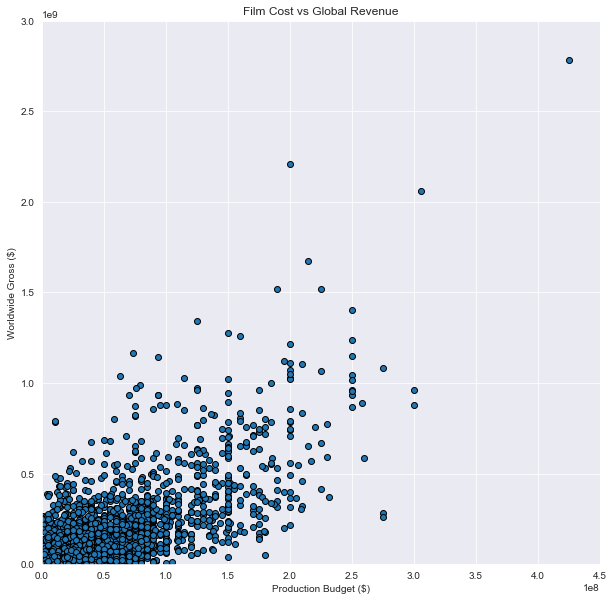

In [18]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
plt.scatter(data['Production Budget ($)'],data['Worldwide Gross ($)'],edgecolors='black',marker='o')
plt.title('Film Cost vs Global Revenue')
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regression=LinearRegression()

In [32]:
x=pd.DataFrame(data['Production Budget ($)'],columns=['Production Budget ($)'])
y=pd.DataFrame(data['Worldwide Gross ($)'],columns=['Worldwide Gross ($)'])

In [33]:
regression.fit(x,y)

LinearRegression()

In [34]:
regression.coef_

array([[3.11150918]])

In [35]:
regression.intercept_

array([-7236192.7291397])

Text(0, 0.5, 'Worldwide Gross ($)')

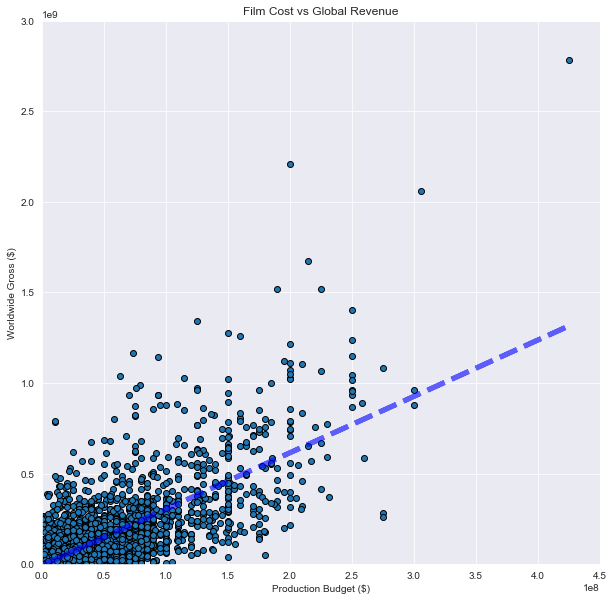

In [48]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
plt.plot(x,regression.predict(x),linewidth=5,ls='dashed',color='blue',alpha=0.6)
plt.scatter(data['Production Budget ($)'],data['Worldwide Gross ($)'],edgecolors='black',marker='o')
plt.title('Film Cost vs Global Revenue')
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')

In [50]:
regression.score(x,y)*100

54.964853569857276